### Fidelity

In [56]:
using JLD, Plots, LaTeXStrings, DataFrames, GLM

In [57]:
data_ce_U2 = JLD.load("../data/purity_ce_Lx6Ly6_U2.jld")
data_ce_U4 = JLD.load("../data/purity_ce_Lx6Ly6_U4.jld")
data_gce_U2 = JLD.load("../data/purity_gce_Lx6Ly6_U2.jld")
data_gce_U4 = JLD.load("../data/purity_gce_Lx6Ly6_U4.jld")

β_U2 = data_ce_U2["beta"]
T_U2 = 1 ./ β_U2
β_U4 = data_ce_U4["beta"]
T_U4 = 1 ./ β_U4

# Fitting
logImP_CE_U2_val = data_ce_U2["logImP_val"]
data1 = DataFrame(X = β_U2[end - 3 : end], Y = logImP_CE_U2_val[end - 3 : end])
ols1 = lm(@formula(Y ~ X), data1)
f1(x) = ols1.model.pp.beta0[2] * x + ols1.model.pp.beta0[1]

logImP_CE_U4_val = data_ce_U4["logImP_val"]
data2 = DataFrame(X = β_U4[end - 2 : end], Y = logImP_CE_U4_val[end - 2 : end])
ols2 = lm(@formula(Y ~ X), data2)
f2(x) = ols2.model.pp.beta0[2] * x + ols2.model.pp.beta0[1]

logImP_GCE_U2_val = data_gce_U2["logImP_val"]
data3 = DataFrame(X = β_U2[end - 3 : end], Y = logImP_GCE_U2_val[end - 3 : end])
ols3 = lm(@formula(Y ~ X), data3)
f3(x) = ols3.model.pp.beta0[2] * x + ols3.model.pp.beta0[1]

logImP_GCE_U4_val = data_gce_U4["logImP_val"]
data4 = DataFrame(X = β_U4[end - 3 : end], Y = logImP_GCE_U4_val[end - 3 : end])
ols4 = lm(@formula(Y ~ X), data4)
f4(x) = ols4.model.pp.beta0[2] * x + ols4.model.pp.beta0[1]

f4 (generic function with 1 method)

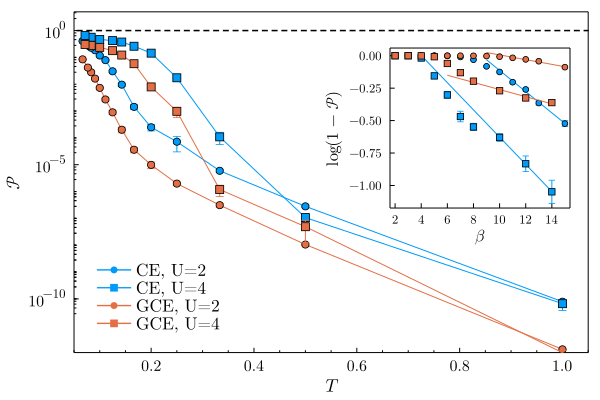

In [58]:
### Plots ###
# rename default colors
cur_colors = get_color_palette(:auto, plot_color(:white))

plt = plot(
    T_U2, data_ce_U2["P_val"], yerror=data_ce_U2["P_err"],
    yaxis=:log,
    marker = (:circle, 4), 
    xlim=(0.05,1.05), ylim=(1e-12,5),
    xminorticks=4, yminorticks=5,
    xlabel=L"T", ylabel=L"\mathcal{P}", 
    label="CE, U=2", 
    lc=cur_colors[1], mc=cur_colors[1], msc = mc=cur_colors[1],
    fontfamily="Computer Modern", 
    legendfontsize = 11,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, 
    grid=:false,
    legend=:bottomleft,
    foreground_color_legend = nothing
)

scatter!(
    T_U2, data_ce_U2["P_val"],
    mc=cur_colors[1], msc = :black,
    label=""
)

plot!(
    T_U4, data_ce_U4["P_val"], yerror=data_ce_U4["P_err"],
    marker = (:square, 4),
    lc=cur_colors[1], mc=cur_colors[1], msc = mc=cur_colors[1],
    label="CE, U=4"
)

scatter!(
    T_U4, data_ce_U4["P_val"],
    marker = (:square, 4),
    mc=cur_colors[1], msc = :black,
    label=""
)

plot!(
    T_U2, data_gce_U2["P_val"], yerror=data_gce_U2["P_err"],
    marker = (:circle, 4),
    lc=cur_colors[2], mc=cur_colors[2], msc = mc=cur_colors[2],
    label="GCE, U=2"
)

scatter!(
    T_U2, data_gce_U2["P_val"],
    mc=cur_colors[2], msc = :black,
    label=""
)

plot!(
    T_U4, data_gce_U4["P_val"], yerror=data_gce_U4["P_err"],
    marker = (:square, 4),
    lc=cur_colors[2], mc=cur_colors[2], msc = mc=cur_colors[2],
    label="GCE, U=4"
)

scatter!(
    T_U4, data_gce_U4["P_val"],
    marker = (:square, 4),
    mc=cur_colors[2], msc = :black,
    label=""
)

hline!(plt, [1.0], line=(1.5, :dash, :black), label="")

## inset plot
# fitted plot
plot!(
    plt,
    f1, β_U2[end-5], β_U2[end],
    lc = cur_colors[1], label="",
    inset=bbox(0.65, 0.12, 0.30, 0.40),
    framestyle=:box, grid=:false,
    subplot=2
)

scatter!(
    plt[2], β_U2[2:end], data_ce_U2["logImP_val"][2:end], yerror=data_ce_U2["logImP_err"][2:end],
    xlabel = L"\beta", ylabel=L"\log(1 - \mathcal{P})",
    label="", marker=(:circle, cur_colors[1], 3.2),
    msc = cur_colors[1]
)

scatter!(
    plt[2], β_U2[2:end], data_ce_U2["logImP_val"][2:end],
    label="", marker=(:circle, cur_colors[1], 3.2),
    msc = :black
)

plot!(
    plt[2],
    f3, β_U2[end-5], β_U2[end],
    lc = cur_colors[2], label=""
)

scatter!(
    plt[2], β_U2[2:end], data_gce_U2["logImP_val"][2:end], yerror=data_gce_U2["logImP_err"][2:end],
    label="", marker=(:circle, cur_colors[2], 3.2),
    msc = cur_colors[2]
)

scatter!(
    plt[2], β_U2[2:end], data_gce_U2["logImP_val"][2:end],
    label="", marker=(:circle, cur_colors[2], 3.2),
    msc = :black
)

plot!(
    plt[2],
    f2, β_U4[end-7], β_U4[end],
    lc = cur_colors[1], label=""
)

scatter!(
    plt[2], β_U4[2:end], data_ce_U4["logImP_val"][2:end], yerror=data_ce_U4["logImP_err"][2:end],
    label="", marker=(:square, cur_colors[1], 3.2),
    msc = cur_colors[1]
)

scatter!(
    plt[2], β_U4[2:end], data_ce_U4["logImP_val"][2:end],
    label="", marker=(:square, cur_colors[1], 3.2),
    msc = :black
)

plot!(
    plt[2],
    f4, β_U4[end-5], β_U4[end],
    lc = cur_colors[2], label=""
)

scatter!(
    plt[2], β_U4[2:end], data_gce_U4["logImP_val"][2:end], yerror=data_gce_U4["logImP_err"][2:end],
    label="", marker=(:square, cur_colors[2], 3.2),
    msc = cur_colors[2]
)

scatter!(
    plt[2], β_U4[2:end], data_gce_U4["logImP_val"][2:end],
    label="", marker=(:square, cur_colors[2], 3.2),
    msc = :black
)

In [59]:
savefig("../figures/Purity_Lx6Ly6.pdf")
savefig("../figures/Purity_Lx6Ly6.svg")